# 현재 까지는 기관이 3일 동안 매수하고 프로그램이 이틀동안 매수 하였을 경우 최대 평균등락률을 구해주었지만 추가 조건을 통해 더 높은 등락률 구해보기

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
# unicode minus를 사용하지 않기 위한 설정 (minus 깨짐현상 방지)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
#데이터 불러와주기
공시기반회사정보 = pd.read_csv('공시기반회사정보20201103.csv', encoding='euc-kr')
재무제표 = pd.read_csv('재무제표20201103.csv', encoding='euc-kr')
투자자 = pd.read_csv('투자자20201103.csv', encoding='euc-kr')

In [4]:
#기관에서 3일동안 매수하고 프로그램은 2일동안 매수한 경우
기관프로매수 = 투자자[
    (
        ((투자자.프로그램순매수1>0) & (투자자.프로그램순매수2>0)) |
        ((투자자.프로그램순매수2>0) & (투자자.프로그램순매수3>0)) |
        ((투자자.프로그램순매수1>0) & (투자자.프로그램순매수3>0))
    ) &
    (
        (투자자.기관순매수1>0) & (투자자.기관순매수2>0) & (투자자.기관순매수3>0)
    )]
#평균 등락률 구해주기
기관프로매수['등락률3매수10매도'] = (기관프로매수['종가10'] - 기관프로매수['종가3']) / 기관프로매수['종가3']

<ipython-input-4-dfd17d43fdaa>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  기관프로매수['등락률3매수10매도'] = (기관프로매수['종가10'] - 기관프로매수['종가3']) / 기관프로매수['종가3']


### 종목끼리 묶어주지 않은 평균 등락률(현재까지 구한 최댓값)

In [5]:
#기관이 3일동안 매수하고 프로그램이 2일 동안 매수했을경우 모든 평균등락률
기관프로매수['등락률3매수10매도'].mean()

0.005909883761188541

In [6]:
#반복문을 통해서 매수 날짜에 따른 모든 매도 날짜의 평균 등락률 구하기

#3번째 날 매수한 상태에서 매도한 날짜에 따른 등락률
#s = 3
#for i in range(10-s):
#    기관프로매수['등락률'+ str(s)+'매수' + str(10-i) +'매도'] = (기관프로매수['종가'+ str(10-i)] - 기관프로매수['종가' + str(s)]) / 기관매수['종가'+ str(s)]

## 상관관계 분석을 위해서 종목별로 데이터 묶어주기

In [6]:
# 영향을 추가로 미칠수 있는 조건을 확인하기 위해서 다른 요인들의 평균 구해주기
#기관과 프로그램 매수의 경우 이미 조건으로 처리해주었기 때문에 배재해 줌.
기관프로종목 = 기관프로매수.groupby('종목').agg(
    {
        '등락률3매수10매도':'mean',
        '거래량1':'mean',
        '거래량2':'mean',
        '거래량3':'mean',
        '등록외국순매수1':'mean',
        '등록외국순매수2':'mean',
        '등록외국순매수3':'mean',
        '비등록외국순매수1':'mean',
        '비등록외국순매수2':'mean',
        '비등록외국순매수3':'mean',
        '외국계순매수1':'mean',
        '외국계순매수2':'mean',
        '외국계순매수3':'mean',
        '외국순매수1':'mean',
        '외국순매수2':'mean',
        '외국순매수3':'mean',
        '기타순매수1':'mean',
        '기타순매수2':'mean',
        '기타순매수3':'mean',
    }
)
기관프로종목

,등락률3매수10매도,거래량1,거래량2,거래량3,등록외국순매수1,등록외국순매수2,등록외국순매수3,비등록외국순매수1,비등록외국순매수2,비등록외국순매수3,외국계순매수1,외국계순매수2,외국계순매수3,외국순매수1,외국순매수2,외국순매수3,기타순매수1,기타순매수2,기타순매수3
종목,,,,,,,,,,,,,,,,,,,
20,0.031818,718309.533333,928249.755556,882631.066667,7797.866667,3799.711111,6883.977778,156.444444,26.822222,177.622222,6477.844444,1688.133333,2424.400000,7954.311111,3826.533333,7061.600000,-11656.044444,-6950.777778,7448.311111
40,0.003033,617977.750000,507863.593750,393766.093750,31625.687500,-1746.875000,10383.093750,2362.218750,467.812500,418.406250,21867.281250,-1957.531250,-707.062500,33987.906250,-1279.062500,10801.500000,20144.468750,6129.843750,-1757.593750
50,-0.006945,25823.531250,28367.531250,29689.781250,826.968750,1679.281250,2756.875000,30.031250,14.500000,-5.312500,645.750000,616.875000,671.375000,857.000000,1693.781250,2751.562500,-437.875000,-354.187500,933.062500
60,0.002663,187386.809524,203678.095238,167252.809524,-21769.095238,-29897.238095,-9713.809524,-143.000000,87.809524,-64.857143,-11092.523810,-21609.809524,-5395.095238,-21912.095238,-29809.428571,-9778.666667,-8019.476190,-7200.190476,-5261.761905
70,-0.035769,12486.866667,13205.400000,12896.700000,651.866667,460.266667,-399.533333,-18.033333,-19.266667,-24.566667,850.066667,439.666667,-371.666667,633.833333,441.000000,-424.100000,-99.433333,-190.600000,-139.633333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348950,0.024413,307452.000000,271710.000000,128564.000000,20182.500000,29230.500000,-9485.500000,1.500000,0.000000,-12000.000000,4482.000000,13600.000000,-363.000000,20184.000000,29230.500000,-21485.500000,-38527.500000,-35500.000000,-10627.000000
350520,-0.050000,66980.000000,102826.000000,63527.000000,4321.000000,-4321.000000,2170.000000,202.000000,2.000000,-10.000000,4321.000000,-4458.000000,2170.000000,4523.000000,-4319.000000,2160.000000,5.000000,24853.000000,0.000000
353190,0.002500,315447.500000,78274.500000,45619.500000,1865.000000,7549.000000,5684.000000,0.000000,0.000000,0.000000,1865.000000,7549.000000,5684.000000,1865.000000,7549.000000,5684.000000,-31523.500000,-10681.000000,-5657.500000


## 히트맵을 통한 상관관계 분석

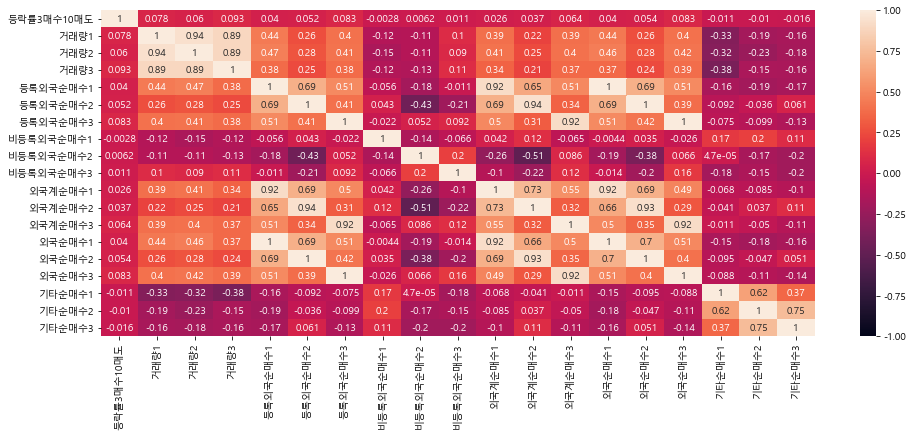

In [7]:
#상관관계의 최댓값과 최솟값은 +1 과 -1 로 설정해주고 히트맵 크기확대
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(기관프로종목.corr(), vmin=-1, vmax=1, annot=True)

#### 1에 가까울수록 강한 양적 상관관계에 있으므로 히트맵 1인 부분부터 조건을 추가해주도록 한다. 

## 등록외국순매수1 과 외국순매수1 의 조건에서 값이 1이므로 이조건을 추가해주기(하락)

#### 평균등락률이 오히려 하락한것을 확인

In [9]:
#기관에서 3일동안 매수하고 프로그램은 2일동안 매수한 경우 + 등록외국순매수1 + 외국순매수1
기프외1매수 = 투자자[
    (
        ((투자자.프로그램순매수1>0) & (투자자.프로그램순매수2>0)) |
        ((투자자.프로그램순매수2>0) & (투자자.프로그램순매수3>0)) |
        ((투자자.프로그램순매수1>0) & (투자자.프로그램순매수3>0))
    ) &
    ((투자자.기관순매수1>0) & (투자자.기관순매수2>0) & (투자자.기관순매수3>0))&
    (투자자.등록외국순매수1>0)&
    (투자자.외국순매수1>0)]

기프외1매수['등락률3매수10매도'] = (기프외1매수['종가10'] - 기프외1매수['종가3']) / 기프외1매수['종가3']

기프외1매수['등락률3매수10매도'].mean()

<ipython-input-9-9b7023596961>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  기프외1매수['등락률3매수10매도'] = (기프외1매수['종가10'] - 기프외1매수['종가3']) / 기프외1매수['종가3']


0.006484291496540786

## 외국순매수2와 등록외국순매수2를 추가해줬을경우(상승)

#### 평균등락률 상승

In [16]:
기프외2매수 = 투자자[
    (
        ((투자자.프로그램순매수1>0) & (투자자.프로그램순매수2>0)) |
        ((투자자.프로그램순매수2>0) & (투자자.프로그램순매수3>0)) |
        ((투자자.프로그램순매수1>0) & (투자자.프로그램순매수3>0))
    ) &
    ((투자자.기관순매수1>0) & (투자자.기관순매수2>0) & (투자자.기관순매수3>0))&
    (투자자.등록외국순매수2>0)&
    (투자자.외국순매수2>0)]

기프외2매수['등락률3매수10매도'] = (기프외2매수['종가10'] - 기프외2매수['종가3']) / 기프외2매수['종가3']

기프외2매수['등락률3매수10매도'].mean()

<ipython-input-16-1facf7ac4fb9>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  기프외2매수['등락률3매수10매도'] = (기프외2매수['종가10'] - 기프외2매수['종가3']) / 기프외2매수['종가3']


0.00759000553191783

## 외국순매수3과 등록외국순매수3 추가

#### 평균등락률 상승

In [15]:
기프외3매수 = 투자자[
     (
        ((투자자.프로그램순매수1>0) & (투자자.프로그램순매수2>0)) |
        ((투자자.프로그램순매수2>0) & (투자자.프로그램순매수3>0)) |
        ((투자자.프로그램순매수1>0) & (투자자.프로그램순매수3>0))
    ) &
    ((투자자.기관순매수1>0) & (투자자.기관순매수2>0) & (투자자.기관순매수3>0))&
    (투자자.등록외국순매수3>0)&
    (투자자.외국순매수3>0)]

기프외3매수['등락률3매수10매도'] = (기프외3매수['종가10'] - 기프외3매수['종가3']) / 기프외3매수['종가3']

기프외3매수['등락률3매수10매도'].mean()

<ipython-input-15-3b8880d438f1>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  기프외3매수['등락률3매수10매도'] = (기프외3매수['종가10'] - 기프외3매수['종가3']) / 기프외3매수['종가3']


0.008672283306085151

## 위의 경우에는 수치가 1.0일경우 들이었고 이번에 0.98의 상관관계를 가질 경우를 계산해본다 

#### 외국계순매수1과 등록외국순매수1

In [14]:
기프외매수 = 투자자[
     (
        ((투자자.프로그램순매수1>0) & (투자자.프로그램순매수2>0)) |
        ((투자자.프로그램순매수2>0) & (투자자.프로그램순매수3>0)) |
        ((투자자.프로그램순매수1>0) & (투자자.프로그램순매수3>0))
    ) &
    ((투자자.기관순매수1>0) & (투자자.기관순매수2>0) & (투자자.기관순매수3>0))&
    (투자자.등록외국순매수1>0)&
    (투자자.외국계순매수1>0)]

기프외매수['등락률3매수10매도'] = (기프외매수['종가10'] - 기프외매수['종가3']) / 기프외매수['종가3']

기프외매수['등락률3매수10매도'].mean()

<ipython-input-14-18484a4c0c13>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  기프외매수['등락률3매수10매도'] = (기프외매수['종가10'] - 기프외매수['종가3']) / 기프외매수['종가3']


0.005911787254050876